In [11]:
import pandas as pd

# load training data
df_train = pd.read_csv("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe02/bss.csv", index_col=0)

df_train.head()

,filename_signal,filename_baseline,label,temperature,temperature_diff,0,1,2,3,4,...,89990,89991,89992,89993,89994,89995,89996,89997,89998,89999
0,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,0,23.19,0.15,-329732.512416,-330948.777725,-332200.143151,-333663.619372,-335226.811633,...,-19031.779871,-18790.248992,-18530.473091,-18243.265918,-17937.674769,-17627.857786,-17306.126681,-16974.483984,-16630.096670,-16260.501639
1,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,0,23.19,6.82,-867840.951209,-869841.233239,-872010.798660,-875031.387082,-878468.367171,...,-654328.977093,-654653.858785,-654960.648434,-655254.880605,-655526.451934,-655743.310248,-655924.677602,-656087.637994,-656225.657605,-656333.493895
2,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,0,23.19,5.97,-956369.579837,-954916.702201,-953697.174336,-953569.552881,-953986.056452,...,-624579.410190,-624380.720357,-624125.915279,-623796.615788,-623407.244968,-622968.049821,-622474.767598,-621945.158426,-621367.315312,-620706.846593
3,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,0,23.19,4.90,-965954.354228,-964652.981314,-963581.073250,-963598.557141,-964156.320206,...,-493451.237538,-493464.648288,-493440.157493,-493366.628042,-493252.339761,-493100.774549,-492911.128249,-492696.475171,-492448.614308,-492145.080476
4,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,0,23.19,-0.18,-234124.301415,-232871.706304,-231642.437918,-230535.174622,-229487.079409,...,-93534.746862,-93503.617791,-93471.754654,-93443.854655,-93413.866929,-93367.063750,-93312.073611,-93253.863219,-93191.204535,-93126.226295


In [19]:
import numpy as np
from fm_processor import load_model, load_svd

# Run inference on BSS training data
svd = load_svd("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe02")
model = load_model("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe02")

data = df_train[df_train.columns[5:]]
data_svd = svd.transform(data)
data_input = np.hstack([df_train.temperature.values[:, np.newaxis], data_svd])

pred = model.predict(data_input)
pred

/Users/huylenguyen/digiLab/FM-digiLab-2025/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], shape=(1428,))

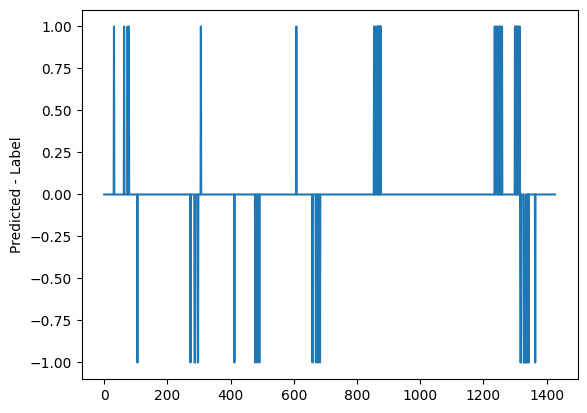

Incorrectly classified BSS samples: 53


In [21]:
import matplotlib.pyplot as plt

plt.plot(pred - df_train.label)
plt.ylabel("Predicted - Label")
plt.show()

print(f"Incorrectly classified BSS samples: {np.count_nonzero(pred - df_train.label)}")

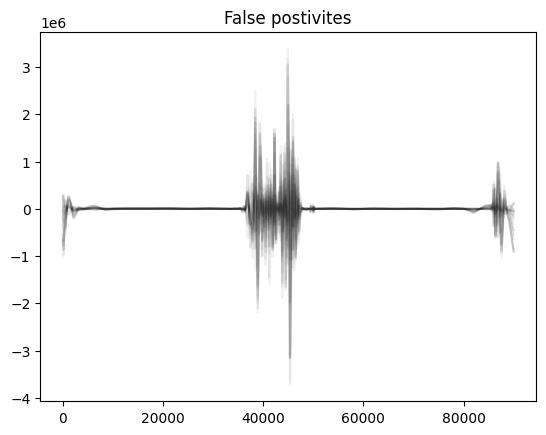

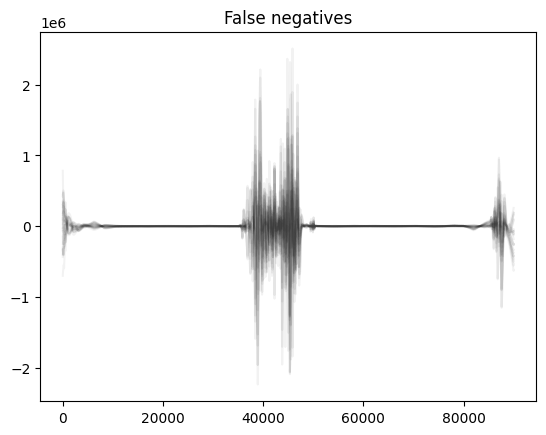

In [22]:
false_positives = np.where((pred - df_train.label) == -1)[0]
false_negatives = np.where((pred - df_train.label) == 1)[0]

plt.plot(df_train.iloc[false_positives][df_train.columns[5:]].values.T, c="k", alpha=0.05)
plt.title("False postivites")
plt.show()

plt.plot(df_train.iloc[false_negatives][df_train.columns[5:]].values.T, c="k", alpha=0.05)
plt.title("False negatives")
plt.show()

In [ ]:
import os
from fm_processor import predict_file

# Run inference on test data with logic BSS
# this is actually just training data because we have no test samples
for root, dirs, files in os.walk("/Users/huylenguyen/digiLab/FM-digiLab-2025/data/raw/pipe02"):
    for file in files:
        label = "clean" not in file
        pred = predict_file(
            os.path.join(root, file),
            "/Users/huylenguyen/digiLab/FM-digiLab-2025/data/processed/pipe02"
        )
        print(f"{file}: {label} - {pred}, {label == pred}")

clean_sig35_2319.npy: False - 0, True
clean_sig47_2304.npy: False - 0, True
clean_sig50_1637.npy: False - 0, True
defect2_sig36_2205.npy: True - 1, True
defect1_sig25_1748.npy: True - 1, True
clean_sig14_1722.npy: False - 0, True
defect1_sig29_1277.npy: True - 1, True
clean_sig13_1829.npy: False - 0, True
clean_sig8_2337.npy: False - 0, True
clean_sig11_2087.npy: False - 0, True
defect2_sig46_2358.npy: True - 1, True
clean_sig5_1857.npy: False - 0, True
defect1_sig17_1428.npy: True - 1, True
clean_sig4_1673.npy: False - 0, True
clean_sig33_1984.npy: False - 0, True
defect1_sig26_1582.npy: True - 1, True
clean_sig15_1597.npy: False - 0, True
defect2_sig44_1957.npy: True - 1, True
defect1_sig19_1800.npy: True - 1, True
defect2_sig42_1477.npy: True - 1, True
clean_sig16_1466.npy: False - 0, True
clean_sig32_1767.npy: False - 0, True
clean_sig10_2256.npy: False - 0, True
clean_sig2_1360.npy: False - 0, True
defect2_sig38_1812.npy: True - 0, False
clean_sig1_1317.npy: False - 0, True
clean_

In [8]:
df_train.loc[
    df_train.filename_signal=="/Users/huylenguyen/digiLab/FM-digiLab-2025/data/raw/pipe01/set04/BIGDEFECT_loc1_64av_WX_A_1551.npy"
].loc[
    df_train.filename_baseline=="/Users/huylenguyen/digiLab/FM-digiLab-2025/data/raw/pipe01/set04/clean_64av_WX_J_1546.npy"
]

,filename_signal,filename_baseline,label,temperature_diff,temperature,0,1,2,3,4,...,48068,48069,48070,48071,48072,48073,48074,48075,48076,48077
239,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,/Users/huylenguyen/digiLab/FM-digiLab-2025/dat...,1,0.05,15.51,-0.499955,-0.499864,-0.499771,-0.49967,-0.499566,...,-0.651921,-0.652248,-0.652574,-0.6529,-0.653227,-0.653553,-0.653878,-0.654204,-0.654529,-0.654854


In [9]:
data = df_train[df_train.columns[5:]]
data_svd = svd.transform(data)
data_input = np.hstack([df_train.temperature.values[:, np.newaxis], data_svd])

/Users/huylenguyen/digiLab/FM-digiLab-2025/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but TruncatedSVD was fitted without feature names
  warnings.warn(
